# 🛍️ Large Retail Sales Data Analysis & Customer Segmentation
# NAME : MUGABO EMMANUEL
# ID : 26735

This project analyzes large-scale retail transaction data to uncover sales trends, product performance, and customer behavior using Python and machine learning. Insights are presented in a dynamic Power BI dashboard for actionable decision-making.


In [1]:
import pandas as pd

# Load the dataset (you can replace this with your CSV file path)
data = pd.read_csv("large_retail_sales_dataset.csv")

# Preview the data
print(data.head())

# Check data types
print(data.dtypes)

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Clean date column
data['Date'] = pd.to_datetime(data['Date'])

# Optional: Ensure Total column is correctly calculated
data['ExpectedTotal'] = data['Quantity'] * data['UnitPrice']
data['Mismatch'] = data['Total'] != data['ExpectedTotal']
print(f"\nMismatched totals: {data['Mismatch'].sum()} rows")

# Drop mismatch column if not needed
data.drop(columns=['Mismatch', 'ExpectedTotal'], inplace=True)


   InvoiceID              Date     Store  Product Category  Quantity  \
0  INV100000  2023-01-01 00:00  Branch A   Hotdog     Food         6   
1  INV100001  2023-01-01 01:00  Branch A     Soda     Food         1   
2  INV100002  2023-01-01 02:00  Branch C     Wrap     Food         9   
3  INV100003  2023-01-01 03:00  Branch C     Wrap     Food         5   
4  INV100004  2023-01-01 04:00  Branch D  Chicken     Food         1   

   UnitPrice PaymentMethod   Total  
0      11.81          Cash   70.86  
1       5.95  Mobile Money    5.95  
2      14.48          Card  130.32  
3       3.36          Cash   16.80  
4       4.28  Mobile Money    4.28  
InvoiceID         object
Date              object
Store             object
Product           object
Category          object
Quantity           int64
UnitPrice        float64
PaymentMethod     object
Total            float64
dtype: object

Missing values per column:
InvoiceID        0
Date             0
Store            0
Product          0
Ca

Descriptive Statistics:

                      Date     Quantity    UnitPrice        Total
count                 5000  5000.000000  5000.000000  5000.000000
mean   2023-04-15 03:30:00     5.469400     8.501560    46.712750
min    2023-01-01 00:00:00     1.000000     2.000000     2.050000
25%    2023-02-22 01:45:00     3.000000     5.210000    18.952500
50%    2023-04-15 03:30:00     5.000000     8.455000    38.660000
75%    2023-06-06 05:15:00     8.000000    11.800000    68.205000
max    2023-07-28 07:00:00    10.000000    15.000000   149.700000
std                    NaN     2.881445     3.778405    34.054889


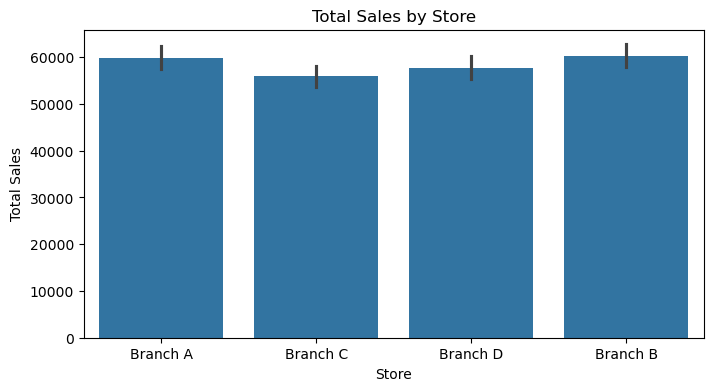

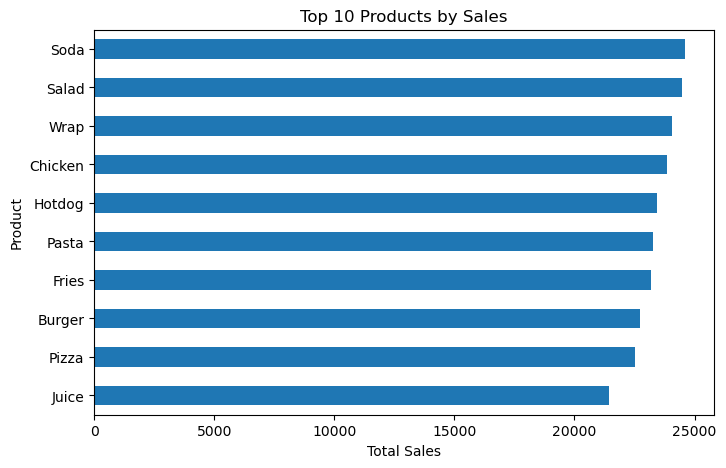

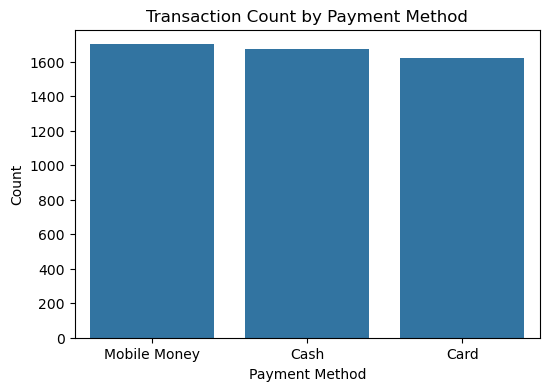

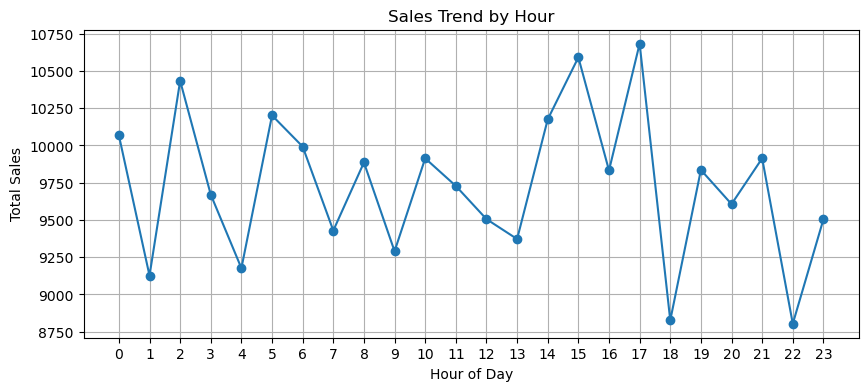

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Summary statistics
print("Descriptive Statistics:\n")
print(data.describe())

# 2. Sales by store
plt.figure(figsize=(8, 4))
sns.barplot(data=data, x='Store', y='Total', estimator=sum)
plt.title("Total Sales by Store")
plt.ylabel("Total Sales")
plt.xlabel("Store")
plt.show()

# 3. Top products by total sales
top_products = data.groupby('Product')['Total'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(8, 5), title="Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.gca().invert_yaxis()
plt.show()

# 4. Sales by payment method
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='PaymentMethod', order=data['PaymentMethod'].value_counts().index)
plt.title("Transaction Count by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

# 5. Time series sales trend
data['Hour'] = data['Date'].dt.hour
sales_by_hour = data.groupby('Hour')['Total'].sum()

plt.figure(figsize=(10, 4))
sales_by_hour.plot(kind='line', marker='o')
plt.title("Sales Trend by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales")
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()


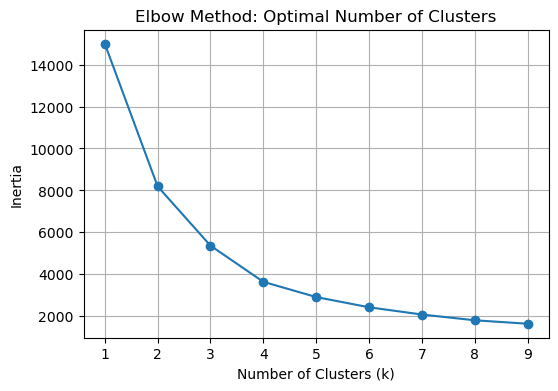

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Features for clustering
X = data[['Quantity', 'UnitPrice', 'Total']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use Elbow Method to find optimal k
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(6, 4))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method: Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [4]:
# Apply KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Preview clustered data
print(data[['Quantity', 'UnitPrice', 'Total', 'Cluster']].head())


   Quantity  UnitPrice   Total  Cluster
0         6      11.81   70.86        1
1         1       5.95    5.95        0
2         9      14.48  130.32        1
3         5       3.36   16.80        2
4         1       4.28    4.28        0


In [5]:
from sklearn.metrics import silhouette_score

# Evaluate the clustering
score = silhouette_score(X_scaled, data['Cluster'])
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.39


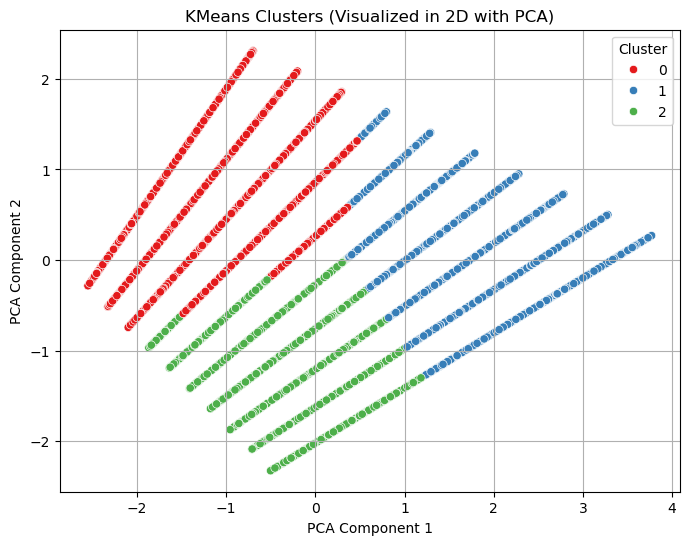

In [6]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Add to DataFrame
data['PCA1'] = components[:, 0]
data['PCA2'] = components[:, 1]

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title("KMeans Clusters (Visualized in 2D with PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [7]:
# Save dataset for Power BI
data.to_csv("retail_sales_clean_clustered.csv", index=False)
print("Saved to retail_sales_clean_clustered.csv")


Saved to retail_sales_clean_clustered.csv


## ✅ Conclusion

This project successfully demonstrated how data analytics and machine learning can enhance retail decision-making. Using KMeans clustering, we segmented transactions based on quantity, price, and total spending. We explored store performance, product sales, and customer purchasing trends. The clustered dataset was evaluated using Silhouette Score and visualized with PCA. Finally, the enriched dataset was prepared for an interactive Power BI dashboard, enabling users to explore insights with ease and precision.

Future work could involve:
- Predictive modeling of customer behavior
- Real-time sales monitoring
- Integration with inventory or loyalty systems
